<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/DataAnalysisWithPython/Module2.A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Data Analysis with Python (IBM)</font>**
##**<font color="darkorange"> Module 2: Notes and exercises Jupyter Notebook</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof Jobish Vallikavungal Devassia**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

### <b><font color="darkorange">PreProcessing:</font></b>
- Necessary step in data analysis
- Process of transforming data from a "raw" state into a another "refined" state.
- Also known as "data cleaning" or "data wrangling" 

In [90]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
masterDataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [91]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### <b><font color="darkorange"> MISSING VALUES </font></b>
- No value is stored for a certain feature in an observation (row/record)
- often respresented as "?", "N/A", 0 or blank cells

<b>Possible strategies</b>
- Validate if data can be recovered or confirmed from whoever provided it
- Remove rows with missing values (if there is not a large number of records in this situation)
- Replace values using mean or mode value.
- leave rows as missing data

##### <b><font color="darkblue">Method dropna() removes rows with missing values (in any of its features)</font></b>
- axis=0 drops rows
- axis=1 drops columns/features
- inplace=true -> performs modifications on the dataframe itslef instead of returning a new dataframe

##### <b><font color="darkblue"> Method replace(missing_value,new_value) replaces a specified value (first argument) with a new value (second argument)</font></b>

- we can use numpy nan (np.nan) to repace missing values.

##### <b><font color="darkorange">DATA FORMATTING</font></b>
- Bringing data into a common standard, as data may come from diferent sources with different formats and covnentions.
- Make data is consistent between sources and ueasy to understand.

For example: New York, NEW YORK, NY, N.Y. -> Into just one value.

In [32]:
masterDataFrame['city-mpg'].head(10)

0    21
1    21
2    19
3    24
4    18
5    19
6    19
7    19
8    17
9    16
Name: city-mpg, dtype: int64

In [33]:
#lets convert the value to liters/100 kms with the following formula
masterDataFrame['city-mpg'] = 235/masterDataFrame['city-mpg']
# tes update the column name accordingly
masterDataFrame.rename(columns={'city-mpg':'city-/100km'}, inplace=True)

masterDataFrame.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-/100km,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,13.823529,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,14.687500,22,?


Fixing incorrect data types
- in our data set, "price" is listed as having an object type, it should be an integer or a float.

In [34]:
masterDataFrame['price'].tail(3)

202    21485
203    22470
204    22625
Name: price, dtype: object

In [38]:
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-/100km,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470.0
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,12.368421,25,22625.0


##### <b><font color="darkorange">DATA NORMALIZATION </font></b>
- Ranges for values within a feature
- Normalize variables to make values consistent between features
- computational advantages 
- avoid biases on feature importance as result of different ranges/scales, make them the same "weight"
- in our example we can normalize age and income into a same form, giving them the same influence in the model.

<b>Strategies:</b>
- Simple Featue Scaling
- MinMax
- Z-score



In [39]:
masterDataFrame.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [41]:
#simple feature scaling in "length"
masterDataFrame['length'] = masterDataFrame["length"]/masterDataFrame["length"].max()
masterDataFrame.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,0.836373,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,6.021776,0.059285,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,86.600000,0.678039,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,94.500000,0.799135,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,97.000000,0.832292,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,102.400000,0.879865,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [42]:
#minmax scaling in "width"
masterDataFrame['width'] = (masterDataFrame["width"]-masterDataFrame["width"].min())/(masterDataFrame["width"].max()-masterDataFrame["width"].min())
masterDataFrame.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,0.836373,0.467317,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,6.021776,0.059285,0.178767,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,86.600000,0.678039,0.000000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,94.500000,0.799135,0.316667,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,97.000000,0.832292,0.433333,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,102.400000,0.879865,0.550000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


In [43]:
#z-score scaling in "height"
masterDataFrame['height'] = (masterDataFrame["height"]-masterDataFrame["height"].mean())/masterDataFrame["height"].std()
masterDataFrame.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-/100km,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,0.836373,0.467317,-5.719003e-16,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268
std,1.245307,6.021776,0.059285,0.178767,1.000000e+00,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284
min,-2.000000,86.600000,0.678039,0.000000,-2.424729e+00,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000
25%,0.000000,94.500000,0.799135,0.316667,-7.058983e-01,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000
50%,1.000000,97.000000,0.832292,0.433333,1.535169e-01,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000
75%,2.000000,102.400000,0.879865,0.550000,7.264604e-01,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,2.486215e+00,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


##### <b><font color="darkorange">BINNING</font></b>
- Act of grouping values into 'bins'
- Converts numeric into categorical values
- For example: turning price values into three categories as [low, medium high]



In [50]:
bins = np.linspace(min(masterDataFrame['price']),max(masterDataFrame['price']),4)
groups = ['Low','Medium','High']
masterDataFrame['binned-price'] = pd.cut(masterDataFrame['price'],bins,labels=groups, include_lowest=True)
masterDataFrame.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-/100km,highway-mpg,price,binned-price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495.0,Low
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500.0,Medium
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450.0,Medium
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250.0,Medium
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,17710.0,Medium
7,1,0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,18920.0,Medium
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,13.823529,20,23875.0,Medium
9,0,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,14.687500,22,0.0,Low


##### <b><font color="darkorange">CATEGORICAL INTO QUANTITATIVE VALUES</font></b>
- Most models cannot take strings as inputs
- Converts numeric into categorical values
- For example 'fuel' values are either 'gas' or 'diesel', two possible values. As per one-hot encoding we will create two new columns, one for each type. We will set '0' where  the fuel is not applicable, '1' where the feature relates to the type of fuel.



In [92]:
masterDataFrame = masterDataFrame.dropna()
pd.get_dummies(masterDataFrame['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


### <font color="darkorange"> MODULE LAB </font>


In [54]:
import pandas as pd
import matplotlib.pylab as plt

In [55]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


##### <b><font color="darkblue">The '?' symbol is being used for missing values in our data set, replace it for numpy's nan.

In [56]:
import numpy as np

# replace "?" to NaN
masterDataFrame.replace("?", np.nan, inplace = True)
masterDataFrame.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### <b><font color="darkblue">We can identify if a value is indeed a null value with the "isnull()" and "notnull()" methods.

In [57]:
missing_data = masterDataFrame.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### <b><font color="darkblue">We can use a for loop to figure out the number of missing values in each column

In [58]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

##### <b><font color="darkblue">Calculate the mean value for the "normalized-losses" column
Replace "NaN" with mean value in "normalized-losses" column

In [60]:
avg_norm_loss = masterDataFrame["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
masterDataFrame["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


##### <b><font color="darkblue">Calculate the mean value for the "bore" column
Replace "NaN" with the mean value in the "bore" column

In [61]:
avg_bore=masterDataFrame['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
masterDataFrame["bore"].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810943


##### <b><font color="darkblue">Replace NaN in "stroke" column with the mean value

In [62]:
avg_stroke=masterDataFrame['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_stroke)
masterDataFrame["stroke"].replace(np.nan, avg_stroke, inplace=True)

Average of bore: 3.3297512437810943


##### <b><font color="darkblue">To see which values are present in a particular column, we can use the ".value_counts()" method:

In [64]:
masterDataFrame['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

##### <b><font color="darkblue">We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:

In [66]:
masterDataFrame['num-of-doors'].value_counts().idxmax()

'four'

In [68]:
#replace the missing 'num-of-doors' values by the most frequent 
masterDataFrame["num-of-doors"].replace(np.nan, "four", inplace=True)

##### <b><font color="darkblue">Finally, let's drop all rows that do not have price data:

In [69]:
# simply drop whole row with NaN in "price" column
masterDataFrame.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
masterDataFrame.reset_index(drop=True, inplace=True)

In [70]:
masterDataFrame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [71]:
masterDataFrame.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [72]:
masterDataFrame[["bore", "stroke"]] = masterDataFrame[["bore", "stroke"]].astype("float")
masterDataFrame[["normalized-losses"]] = masterDataFrame[["normalized-losses"]].astype("int")
masterDataFrame[["price"]] = masterDataFrame[["price"]].astype("float")
masterDataFrame[["peak-rpm"]] = masterDataFrame[["peak-rpm"]].astype("float")
masterDataFrame.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [73]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
masterDataFrame['city-L/100km'] = 235/masterDataFrame["city-mpg"]

# check your transformed data 
masterDataFrame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


##### <b><font color="darkblue">Transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km.

In [ ]:
# Write your code below and press Shift+Enter to execute 
masterDataFrame['highway-mpg'] = 235/masterDataFrame["highway-mpg"]
masterDataFrame.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)


##### <b><font color="darkblue">To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
Approach: replace original value by (original value)/(maximum value)

In [74]:
masterDataFrame['length'] = masterDataFrame['length']/masterDataFrame['length'].max()
masterDataFrame['width'] = masterDataFrame['width']/masterDataFrame['width'].max()
masterDataFrame['height'] = masterDataFrame['height']/masterDataFrame['height'].max()

In [76]:
masterDataFrame[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [93]:
masterDataFrame = masterDataFrame.dropna()
dummy_variable_1 = pd.get_dummies(masterDataFrame["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [94]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [95]:
# merge data frame "df" and "dummy_variable_1" 
masterDataFrame = pd.concat([masterDataFrame, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
masterDataFrame.drop("fuel-type", axis = 1, inplace=True)
masterDataFrame

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,0,1
1,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,0,1
2,1,?,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845,0,1
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045,0,1
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485,0,1
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470,1,0


In [96]:
masterDataFrame['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

##### <b><font color="darkblue">Similar to before, create an indicator variable for the column "aspiration"</b>

In [98]:
dummy_variable_2 = pd.get_dummies(masterDataFrame["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)
df = pd.concat([masterDataFrame, dummy_variable_2], axis=1)
masterDataFrame.drop("aspiration", axis = 1, inplace=True)
masterDataFrame.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,?,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495,0,1
1,3,?,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500,0,1
2,1,?,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,1
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950,0,1
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,1


###**<font color="darkorange">GRADED REVIEW QUESTIONS - EVIDENCE.</font>**

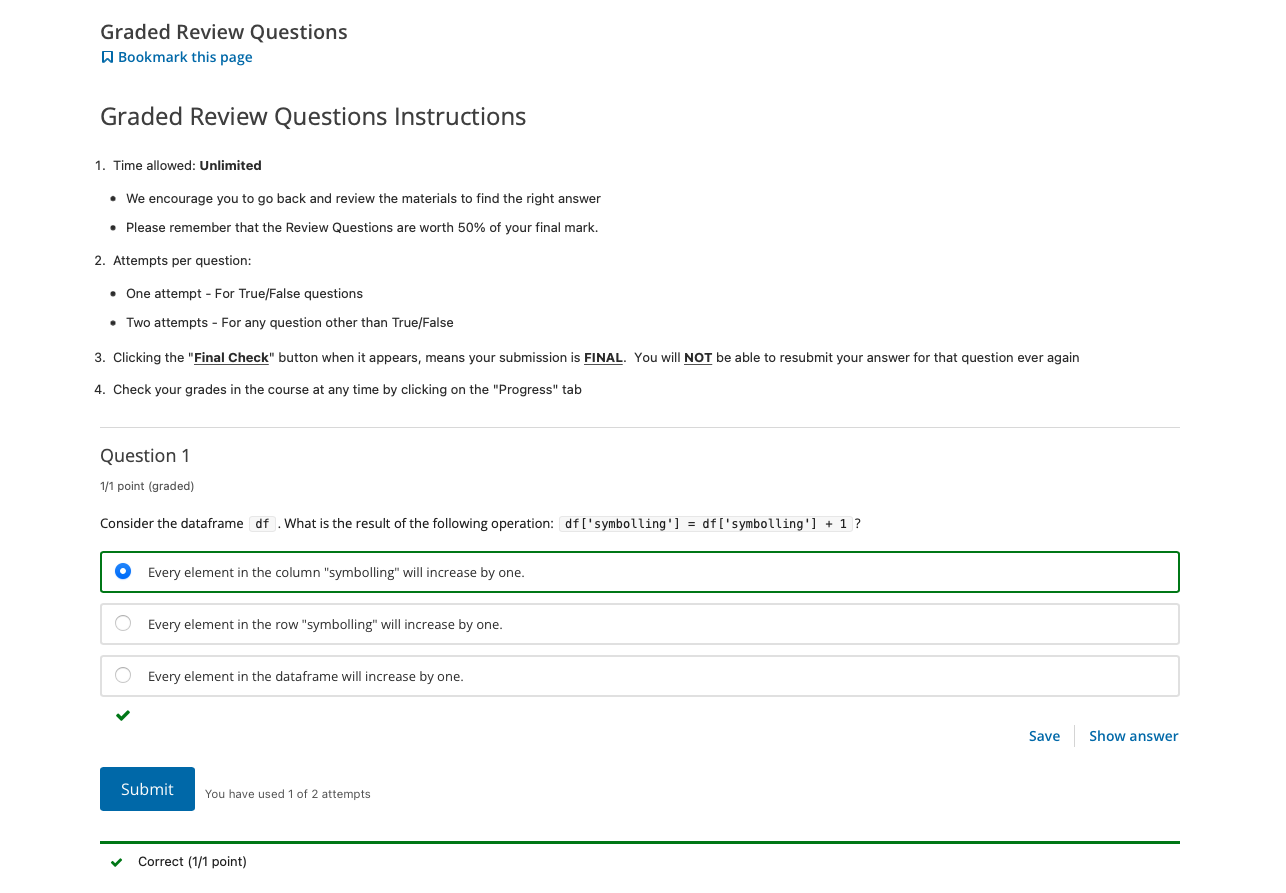

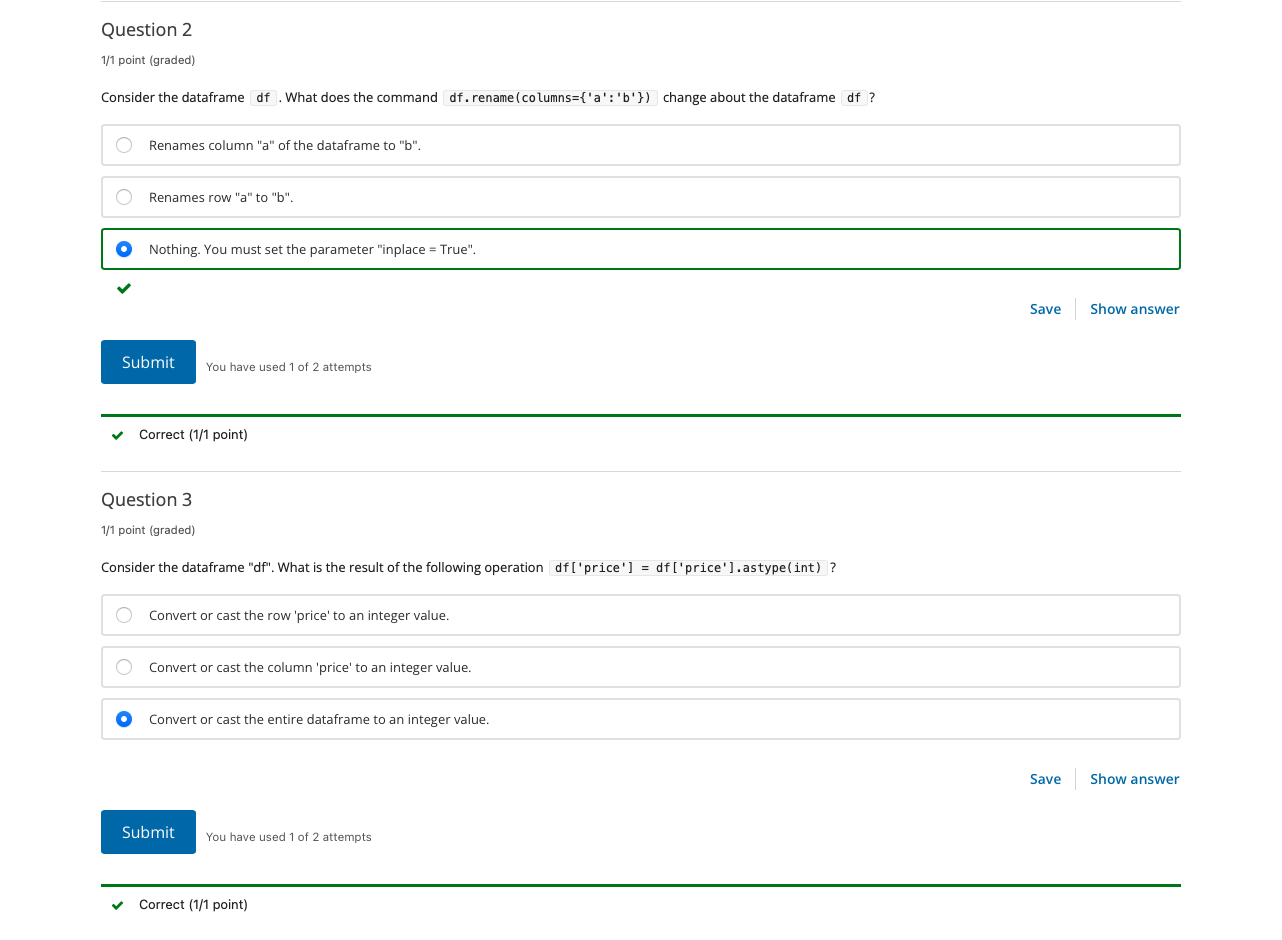

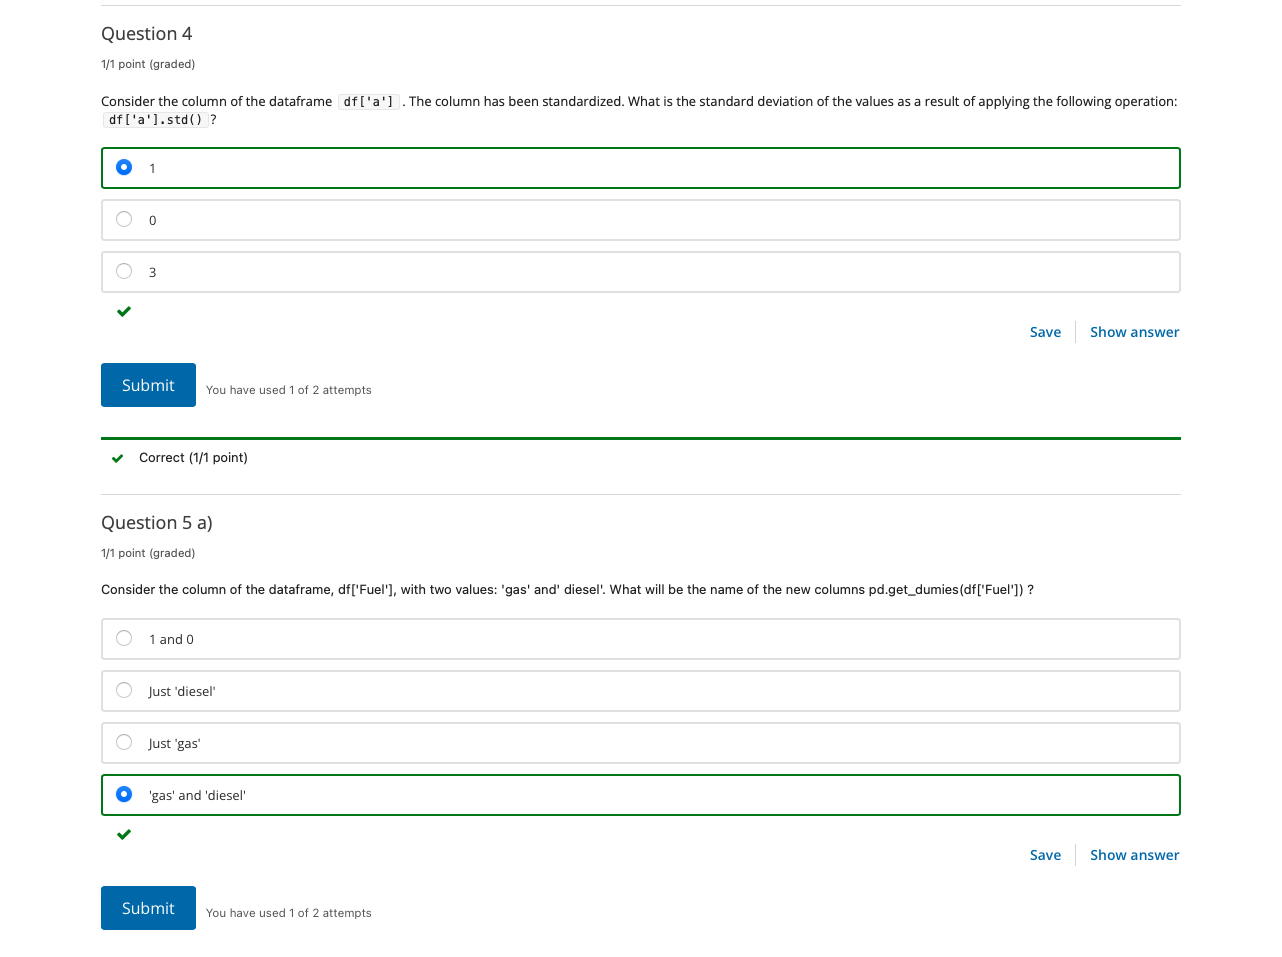

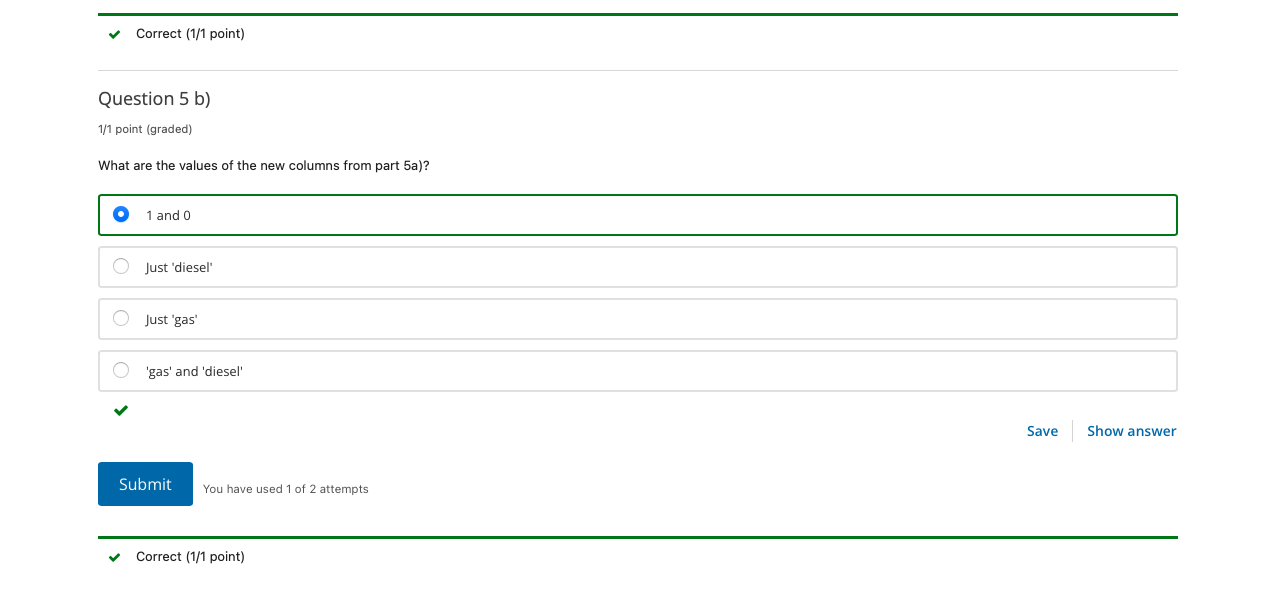

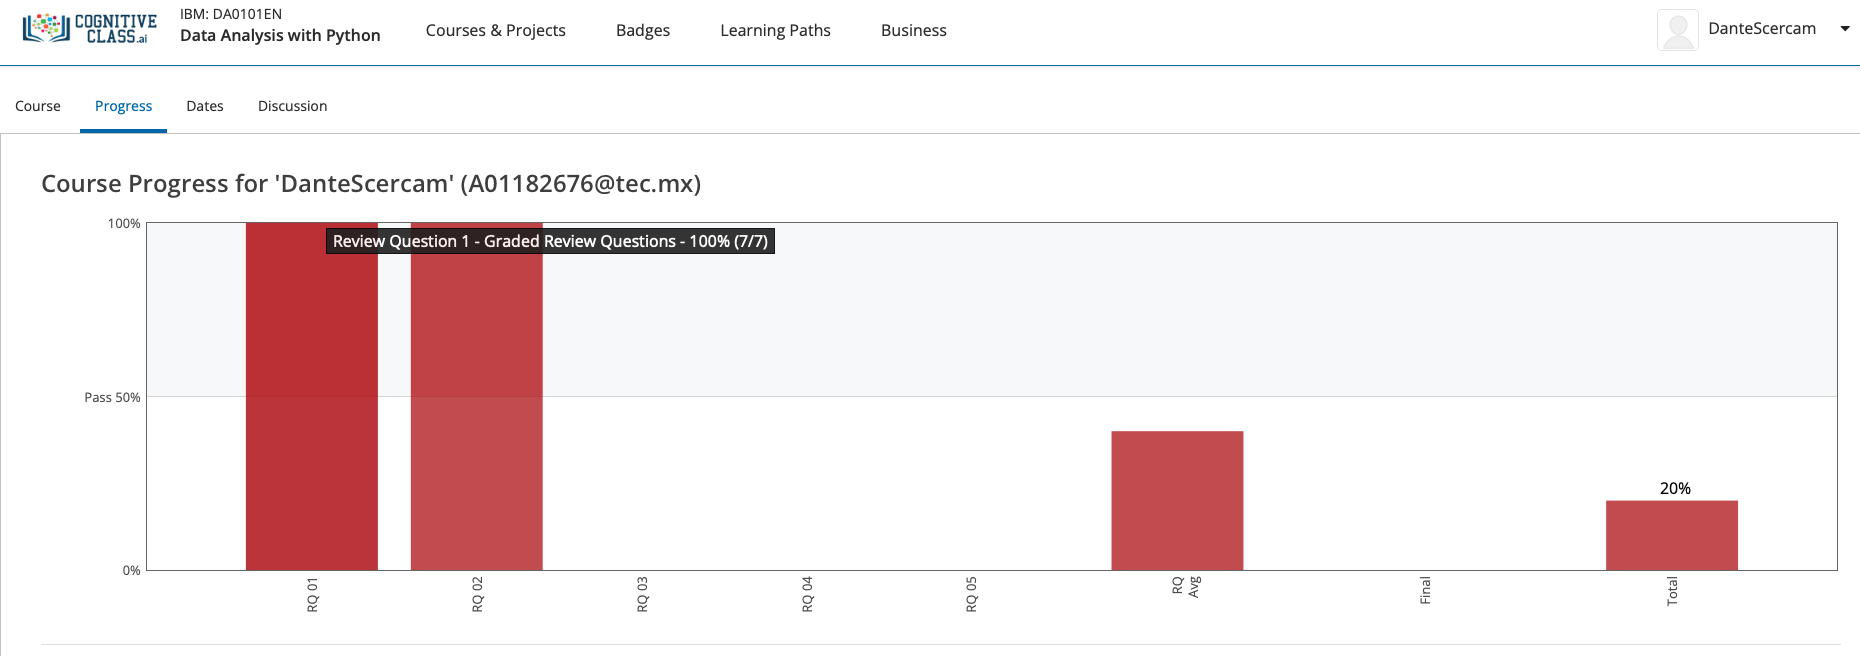